# Histograma

Es una representacion grafica donde se muestran los distintos niveles de intensidad de una imagen a escala de grises, su rango de valores va de 0 a 255 normalmente.

- El eje horizontal del histograma representa los diferentes niveles de brillo que van desde el negro (0) hasta el blanco (255).
- El eje vertical representa el numero de pixeles que hay en cada nivel de brillo.
- Las barras del histograma muestran la cantidad de pixeles para cada nuvel de brillo. Cuanto mas alra sea la barr, mas pixeles hay en ese nivel de brillo. 

El calculo del histograma en opencv se realiza por medio de la funcion **`calcHist()`**

- Sintaxis

`cv2.calcHist(images, channels, mask, histSize, ranges[, hist, accumulate])`

- Argumentos

    - **`images`**: Una lista de imágenes de una o varias dimensiones.
    - **`channels`**: Una lista de índices de canal para calcular el histograma. Por ejemplo, [0] para el canal rojo, [1] para el canal verde y [0, 1] para los canales rojo y verde juntos.
    - **`mask`**: Una máscara opcional para seleccionar una región específica de la imagen. Si es None, se utiliza toda la imagen.
    - **`histSize`**: Una lista que especifica el número de bins para cada canal. Por ejemplo, [256, 256, 256] para 256 bins para cada canal de color en una imagen RGB.
    - **`ranges`**: Un rango opcional para cada canal. Por defecto, se utiliza [0, 255] para imágenes de 8 bits.
    - **`hist`**: Un array opcional para almacenar el histograma calculado.
    - **`accumulate`**: Un booleano opcional que indica si se debe acumular el histograma en una matriz existente.



In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# 03/img/225V3H~L.JPG
#03/img/2HDO96~W.JPG

# img = cv.imread('./img/2HDO96~W.JPG')
# /home/pigore/vision_python/PDI/img/27P1TX~A.JPG
img = cv.imread('../img/27P1TX~A.JPG')

## Histograma de imagen en escala de grises

En este ejmplo calcularemos el histograma de una imagen en escala de grises.

-  Convertiremos la imagen leida en una imagen en escala de grises.
- Por medio de la funcion `calcHist()` hallaremos el histograma de dicha imagen.
    - `[grayscale_img]`: Esta es una lista que contiene la imagen (que se supone que es en escala de grises).
    - `[0]`: Esto especifica que solo consideramos un canal (índice 0) para el cálculo del histograma. Dado que es en escala de grises, solo hay un canal.
    - `None`: Este argumento es para una máscara (no se usa aquí).
    - `[256]`: Esto especifica el número de bins (256) en el histograma. Cada bin representa un rango de intensidades de píxeles (0-255 para imágenes en escala de grises).
    - `[0, 255]`: Esto define el rango de intensidades de píxeles que se considerarán para el histograma (0-255 para imágenes en escala de grises).

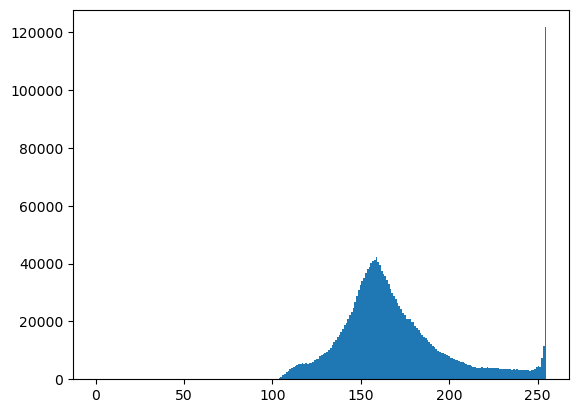

In [2]:
grayscale_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
hist = cv.calcHist([grayscale_img], [0], None, [256], [0, 255])
plt.hist(img.ravel(), 256, (0, 255))
plt.show()

## Histograma en imagen a color

El cálculo del histograma de una imagen a color en OpenCV implica algunos pasos adicionales en comparación con una imagen en escala de grises debido a la presencia de múltiples canales de color.

- Definimos una tupla llamada `colors` que contiene tres elementos: 'b', 'g' y 'r'. Estos representan los códigos de color para azul, verde y rojo, respectivamente. Se utilizarán más adelante para asignar colores a los histogramas.
- Se inicia un bucle for que itera sobre la tupla `colors`
    - `enumerate` es una función que devuelve pares de índice (i) y valor (col) en cada iteración.
    - `i` representará el índice del canal de color actual (0 para azul, 1 para verde, 2 para rojo).
    - `col` representará el código de color actual ('b', 'g' o 'r').
    - Dentro del bucle, se calcula el histograma para el canal de color actual usando la función `cv.calcHist` de OpenCV
        - `[img]`: Es una lista que contiene la imagen a procesar.
        - `[i]`: Indica el índice del canal de color a utilizar para el histograma (obtenido de la variable i en cada iteración).
        - `None`: No se usa máscara en este caso (se considera toda la imagen).
        - `[256]`: Define el número de bins (contenedores) del histograma, en este caso 256 para representar todas las posibles intensidades de píxeles (de 0 a 255).
        - `[0, 255]`: Especifica el rango de valores de intensidad considerados para el histograma (también de 0 a 255).
- Diagrama del histograma: `plt.plot(hist, color = col)`
    - `hist`: Son los datos del histograma obtenidos en el paso anterior.
    - `color = col`: Asigna el código de color correspondiente ('b', 'g', o 'r') al diagrama según el canal actual. Esto permite visualizar los histogramas de cada canal con un color diferente.
- Eje X del diagrama: `plt.xlim([0, 256])`
    - `[0, 256]`: Establece el rango del eje X desde 0 hasta 255 para representar adecuadamente las intensidades de los píxeles en el histograma.
Finalmente mostramos el diagramde  los histogramas por medio de la funcion `plt.show()`

0 b
1 g
2 r


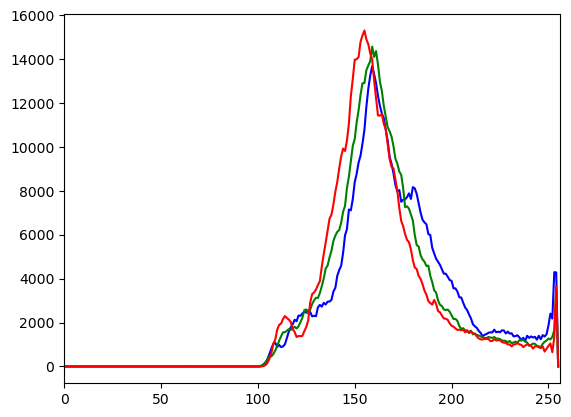

In [3]:
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    print(i, col)
    hist = cv.calcHist([img], [i], None, [256], [0, 255])

    plt.plot(hist, color = col)
    plt.xlim([0, 256])

plt.show()

## Aplicacion de mascaras al calculo de histograma

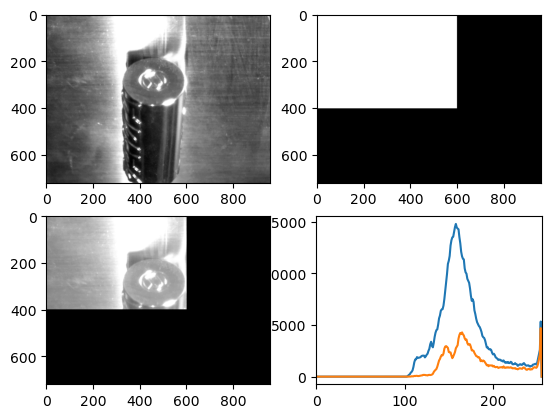

In [4]:
mask = np.zeros(grayscale_img.shape[:2], np.uint8)
mask[0:400, 0:600] = 255
masked_img = cv.bitwise_and(grayscale_img, grayscale_img, mask = mask)

all_hist = cv.calcHist([grayscale_img], [0], None, [256], [0, 255])

mask_hist = cv.calcHist([grayscale_img], [0], mask, [256], [0, 255])

plt.subplot(221), plt.imshow(grayscale_img, "gray")
plt.subplot(222), plt.imshow(mask, "gray")
plt.subplot(223), plt.imshow(masked_img, "gray")
plt.subplot(224), plt.plot(all_hist), plt.plot(mask_hist)
plt.xlim([0, 255])
plt.show()